# REDA Example Notebook

## Setup

In [1]:
# In case you want to try the newest version from git.
# Please be aware that this may break this notebook
# !pip install git+git://github.com/geophysics-ubonn/reda

In [1]:
import pandas as pd
pd.set_option('display.width', 1000)

%matplotlib inline
import reda.utils.mpl
plt, mpl = reda.utils.mpl.setup()

import numpy as np
np.random.seed(2017)

from glob import glob

## Usage of reda

In [2]:
# get list of data files
data_files = sorted(glob('data/pygimli_*.ohm'))
# take only each tenth data file
data_files = data_files[0:-1:10]

In [3]:
from reda import ERT

obj = ERT()

for nr, filename in enumerate(data_files):
    obj.import_bert(filename, timestep=nr)
  
obj.compute_K_analytical(spacing=1)

2020-12-01 10:47:13,129 - reda.containers.ERT            - %INFO       - Unified data format (BERT/pyGIMLi) file import
2020-12-01 10:47:13,253 - reda.containers.ERT            - %INFO       - Data sized changed from 0 to 741
2020-12-01 10:47:13,254 - reda.containers.ERT            - %INFO       - Unified data format (BERT/pyGIMLi) file import


Calculating resistance from apparent resistivity and geometric factors. (r = rhoa_ / k)
Calculating resistance from apparent resistivity and geometric factors. (r = rhoa_ / k)


2020-12-01 10:47:13,382 - reda.containers.ERT            - %INFO       - Data sized changed from 741 to 1482
2020-12-01 10:47:13,382 - reda.containers.ERT            - %INFO       - Unified data format (BERT/pyGIMLi) file import
2020-12-01 10:47:13,509 - reda.containers.ERT            - %INFO       - Data sized changed from 1482 to 2223
2020-12-01 10:47:13,510 - reda.containers.ERT            - %INFO       - Unified data format (BERT/pyGIMLi) file import


Calculating resistance from apparent resistivity and geometric factors. (r = rhoa_ / k)
Calculating resistance from apparent resistivity and geometric factors. (r = rhoa_ / k)


2020-12-01 10:47:13,646 - reda.containers.ERT            - %INFO       - Data sized changed from 2223 to 2964
2020-12-01 10:47:13,646 - reda.containers.ERT            - %INFO       - Unified data format (BERT/pyGIMLi) file import
2020-12-01 10:47:13,786 - reda.containers.ERT            - %INFO       - Data sized changed from 2964 to 3705
2020-12-01 10:47:13,787 - reda.containers.ERT            - %INFO       - Unified data format (BERT/pyGIMLi) file import


Calculating resistance from apparent resistivity and geometric factors. (r = rhoa_ / k)
Calculating resistance from apparent resistivity and geometric factors. (r = rhoa_ / k)


2020-12-01 10:47:13,944 - reda.containers.ERT            - %INFO       - Data sized changed from 3705 to 4446
2020-12-01 10:47:13,945 - reda.containers.ERT            - %INFO       - Unified data format (BERT/pyGIMLi) file import
2020-12-01 10:47:14,105 - reda.containers.ERT            - %INFO       - Data sized changed from 4446 to 5187
2020-12-01 10:47:14,105 - reda.containers.ERT            - %INFO       - Unified data format (BERT/pyGIMLi) file import


Calculating resistance from apparent resistivity and geometric factors. (r = rhoa_ / k)
Calculating resistance from apparent resistivity and geometric factors. (r = rhoa_ / k)


2020-12-01 10:47:14,272 - reda.containers.ERT            - %INFO       - Data sized changed from 5187 to 5928
2020-12-01 10:47:14,273 - reda.containers.ERT            - %INFO       - Unified data format (BERT/pyGIMLi) file import
2020-12-01 10:47:14,445 - reda.containers.ERT            - %INFO       - Data sized changed from 5928 to 6669
2020-12-01 10:47:14,445 - reda.containers.ERT            - %INFO       - Unified data format (BERT/pyGIMLi) file import


Calculating resistance from apparent resistivity and geometric factors. (r = rhoa_ / k)
Calculating resistance from apparent resistivity and geometric factors. (r = rhoa_ / k)


2020-12-01 10:47:14,629 - reda.containers.ERT            - %INFO       - Data sized changed from 6669 to 7410


In [4]:
# hack together reciprocals
import pandas as pd
data_rec = obj.data.values
dfr = pd.DataFrame(
    np.hstack((data_rec[:, 2:4], data_rec[:, 0:2], data_rec[:, 4:])),
    columns=obj.data.columns
)

# need to set the data types accordingly
for key, dtype in obj.data.dtypes.items():
    dfr[key] = dfr[key].astype(dtype)

print(dfr.head(5))

# add some noise
dfr['rho_a'] = dfr['rho_a'] + 0.05 * dfr['rho_a'].values * np.random.randn(dfr.shape[0])
obj.data = pd.concat((obj.data, dfr))

   a  b  m  n  timestep           k          r       rho_a  valid  id norrec  rdiff  rho_adiff   sigma_a
0  4  3  1  2         0   18.849556  16.660311  314.039461    1.0   0    nor    NaN        NaN  0.060023
1  5  4  1  2         0   75.398224   4.241190  319.778194    1.0   1    nor    NaN        NaN  0.235783
2  6  5  1  2         0  188.495559   1.662108  313.299886    1.0   2    nor    NaN        NaN  0.601646
3  7  6  1  2         0  376.991118   0.813218  306.575992    1.0   3    nor    NaN        NaN  1.229682
4  8  7  1  2         0  659.734457   0.449058  296.259105    1.0   4    nor    NaN        NaN  2.226883


In [5]:
print(obj.data.head(10))

   a  b   m   n  timestep            k          r       rho_a  valid  id norrec  rdiff  rho_adiff    sigma_a
0  1  2   4   3         0    18.849556  16.660311  314.039461    1.0   0    nor    NaN        NaN   0.060023
1  1  2   5   4         0    75.398224   4.241190  319.778194    1.0   1    nor    NaN        NaN   0.235783
2  1  2   6   5         0   188.495559   1.662108  313.299886    1.0   2    nor    NaN        NaN   0.601646
3  1  2   7   6         0   376.991118   0.813218  306.575992    1.0   3    nor    NaN        NaN   1.229682
4  1  2   8   7         0   659.734457   0.449058  296.259105    1.0   4    nor    NaN        NaN   2.226883
5  1  2   9   8         0  1055.575132   0.274267  289.509467    1.0   5    nor    NaN        NaN   3.646082
6  1  2  10   9         0  1583.362697   0.178931  283.312170    1.0   6    nor    NaN        NaN   5.588756
7  1  2  11  10         0  2261.946711   0.121960  275.867204    1.0   7    nor    NaN        NaN   8.199404
8  1  2  12  11    

In [6]:
# these timesteps where imported
print(obj.data.groupby('timestep').groups.keys())

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


## Filtering data

In [8]:
# apply to all timesteps
# obj.filter('K > 1000')

In [7]:
# apply only to timestep 10
obj.sub_filter(
    'timestep in [3, 7]',
    'a > 10 and a < 20 and k > 1000',    
)

2020-12-01 10:47:41,530 - reda.containers.ERT            - %INFO       - Data sized changed from 14820 to 14352


In [8]:
print(obj.data.query('timestep == 3 and rho_a < 200'))

       a   b   m   n  timestep            k         r       rho_a  valid   id norrec  rdiff  rho_adiff     sigma_a
2227   1   2   8   7         3   659.734457  0.289292  190.855950    1.0    4    nor    NaN        NaN    3.456714
2228   1   2   9   8         3  1055.575132  0.124387  131.299422    1.0    5    nor    NaN        NaN    8.039450
2229   1   2  10   9         3  1583.362697  0.053796   85.178704    1.0    6    nor    NaN        NaN   18.588716
2230   1   2  11  10         3  2261.946711  0.022858   51.703278    1.0    7    nor    NaN        NaN   43.748613
2231   1   2  12  11         3  3110.176727  0.009497   29.537502    1.0    8    nor    NaN        NaN  105.295861
...   ..  ..  ..  ..       ...          ...       ...         ...    ...  ...    ...    ...        ...         ...
2941  40  39  32  33         3  1055.575132  0.096384  108.581504    1.0  718    nor    NaN        NaN   10.375209
2942  41  40  32  33         3  1583.362697  0.047888   75.130456    1.0  719   

## Histogram plotting

In [9]:
obj.data.dtypes

a              int64
b              int64
m              int64
n              int64
timestep       int64
k            float64
r            float64
rho_a        float64
valid        float64
id             int64
norrec        object
rdiff        float64
rho_adiff    float64
sigma_a      float64
dtype: object

Figure(425.197x141.732)


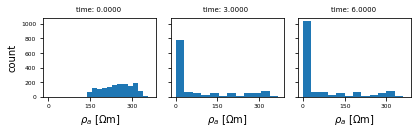

In [12]:
import reda.plotters.histograms as RH
return_dict = RH.plot_histograms_extra_dims(
    obj,
    keys=['rho_a', ],
    extra_dims=['timestep', ],
    Nx=5,
    #subquery='timestep in {0}'.format(list(range(0, 100, 10))),
    subquery='timestep in [0, 3, 6]'
)
fig = return_dict[1]['all']
print(fig)
# print(fig.get_figwidth(), fig.get_figheight())
fig.savefig('histogram.png', dpi=300)

## Plotting Pseudosections

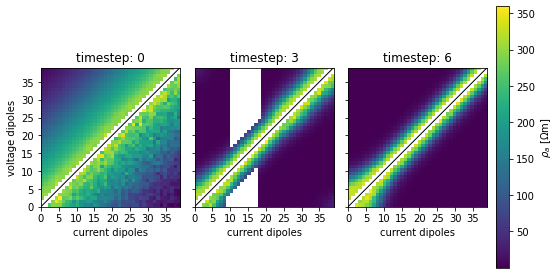

In [13]:
import reda.plotters.pseudoplots as PS
fig = PS.plot_ps_extra(
    obj, 'rho_a',
    subquery='timestep in [0, 3, 6]'
)
fig.set_size_inches(7.87, 3.93)
fig.tight_layout()
fig.savefig('pseudoplots.png', dpi=600)

## Analyzing time series

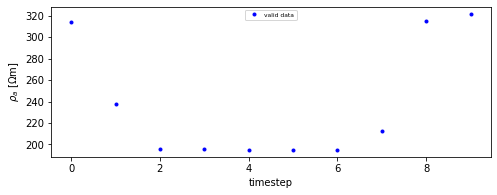

In [14]:
import reda.plotters.time_series as TS

fig, ax = TS.plot_quadpole_evolution(
    obj,
    [10, 11, 15, 14],
    'rho_a',
    threshold=0.05,
    rolling=False,
)

In [15]:
# add some noise to the data
import numpy as np
np.random.seed(2017)
obj.data['rho_a'] = obj.data['rho_a'] + (np.abs(obj.data['rho_a'] * 0.05 * np.random.randn(obj.data.shape[0])))

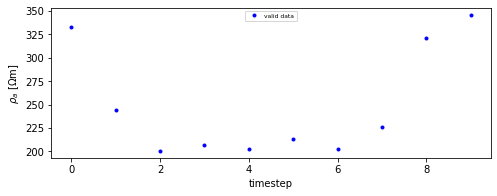

In [16]:
fig, ax = TS.plot_quadpole_evolution(
    obj,
    [10, 11, 15, 14],
    'rho_a',
    threshold=0.05,
    rolling=False,
)

## The Data Journal

In [17]:
obj.print_data_journal()


--- Data Journal Start ---
2020-12-01 10:48:34.535947
Data was imported from file pygimli_paper_data000.ohm (741 data points)
Data was imported from file pygimli_paper_data010.ohm (741 data points)
Data was imported from file pygimli_paper_data020.ohm (741 data points)
Data was imported from file pygimli_paper_data030.ohm (741 data points)
Data was imported from file pygimli_paper_data040.ohm (741 data points)
Data was imported from file pygimli_paper_data050.ohm (741 data points)
Data was imported from file pygimli_paper_data060.ohm (741 data points)
Data was imported from file pygimli_paper_data070.ohm (741 data points)
Data was imported from file pygimli_paper_data080.ohm (741 data points)
Data was imported from file pygimli_paper_data090.ohm (741 data points)
A filter was applied with query "a > 10 and a < 20 and k > 1000". In total 468 records were removed
--- Data Journal End ---

